In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [4]:
X

array([[-7.99273606, -7.9133845 ],
       [-6.51155829, -5.97997547],
       [ 8.00545056,  9.36339071],
       ...,
       [ 2.45792791, -0.688586  ],
       [ 2.1572253 ,  0.04882383],
       [-6.51354194, -7.03229679]], shape=(1000, 2))

In [5]:
y

array([2, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 1, 0, 1,
       0, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 0,
       1, 0, 0, 2, 1, 1, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 2, 1,
       0, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 0, 1,
       1, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 0, 0, 2, 1, 0, 2, 0, 2,
       1, 1, 1, 0, 0, 1, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 2, 2, 2, 0, 1, 0,
       0, 1, 0, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 2, 0, 2, 2, 1,
       1, 2, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 2, 0,
       0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 2, 2, 1, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2,

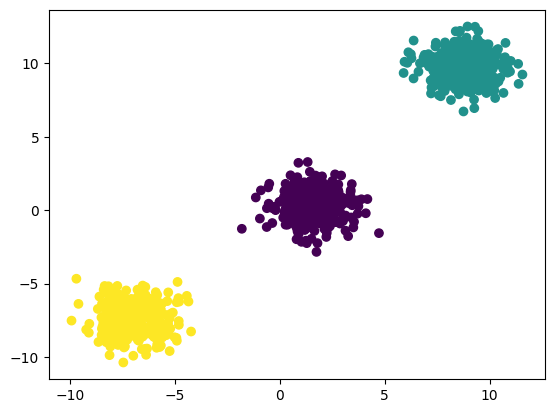

In [6]:
plt.scatter(X[:,0],X[:,1],c=y)

In [7]:
# train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3)

In [8]:
## standardization
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()


In [9]:
X_train_scaled=std_scaler.fit_transform(X_train)
X_test_scaled=std_scaler.transform(X_test)
X_train_scaled

array([[-1.1205061 , -1.48533418],
       [-1.31584966, -1.13539577],
       [-1.24097836, -1.31699992],
       ...,
       [ 0.05984293, -0.1194416 ],
       [ 0.06433278,  0.03878562],
       [ 1.0289765 ,  1.33773215]], shape=(700, 2))

In [10]:
from sklearn.cluster import KMeans

In [11]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)
wcss

[1399.9999999999998,
 362.68375558756276,
 30.221559678952644,
 27.151807461066923,
 23.085658089687932,
 20.009793817483935,
 17.75128475758791,
 15.569962598744446,
 13.396604519871103,
 12.617371145166949]

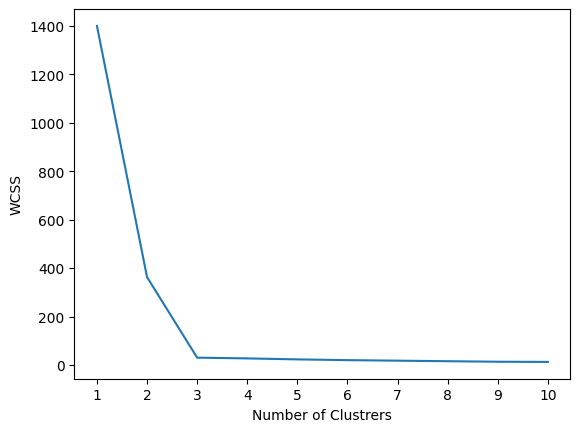

In [12]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [13]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [14]:
kmeans.fit_predict(X_train_scaled)

array([2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2, 0, 2, 0, 1, 1, 1, 2, 1,
       0, 2, 1, 2, 1, 0, 2, 2, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1, 2, 1, 2, 2, 1, 0, 2, 1,
       2, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1,
       2, 0, 0, 2, 2, 2, 1, 1, 2, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 1, 2,
       1, 1, 1, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 1, 1, 2,
       1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 0, 0, 1, 0, 1,
       2, 2, 0, 1, 0, 2, 0, 0, 2, 0, 0, 2, 1, 1, 1, 2, 1, 0, 2, 1, 2, 0,
       2, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 0, 2,
       2, 0, 0, 2, 1, 1, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 1, 1,
       2, 1, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 2, 1, 0, 0,
       0, 0, 2, 2, 2, 0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 0, 0, 0, 2, 2, 0,
       1, 0, 1, 0, 2, 2, 2, 1, 2, 1, 0, 0, 1, 2, 0,

In [15]:
y_pred=kmeans.predict(X_test_scaled)

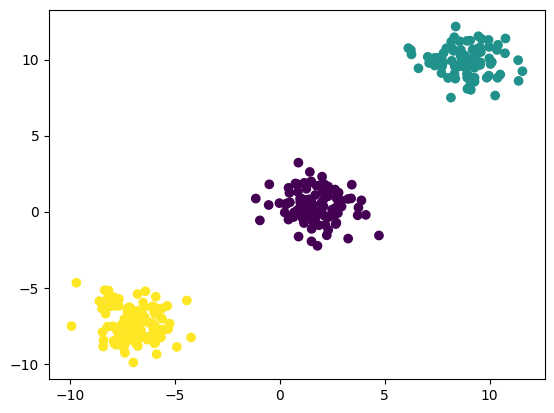

In [16]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [17]:
from kneed import KneeLocator

In [18]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [19]:
kl.elbow

np.int64(3)

In [20]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [21]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [22]:
silhouette_coefficients

[0.667018456470672,
 0.8437952485111001,
 0.672674488962426,
 0.48207445019486955,
 0.4957381805231587,
 0.32940797929171844,
 0.33346826000673796,
 0.3322129092547924,
 0.3160744193142534]

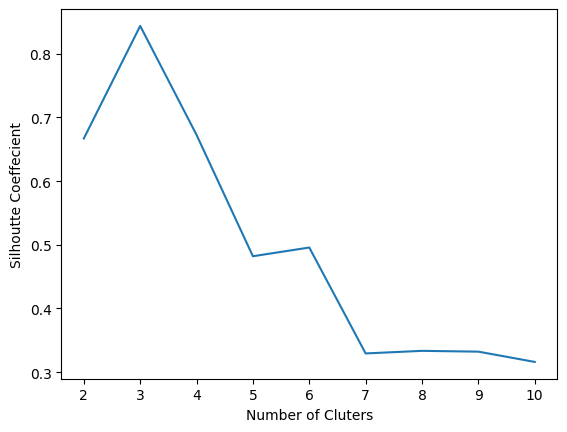

In [23]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()